In [262]:
# Importing all the libraries
import torch
from torch import nn
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torch
from torch import nn

torch.__version__

# Path of the file to read
train_path = '../input/chest-ctscan-images/Data/train'
test_path = '../input/chest-ctscan-images/Data/test'
valid_path = '../input/chest-ctscan-images/Data/valid'

print(train_path)

../input/chest-ctscan-images/Data/train


In [263]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1. Display a random image from the dataset

../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
../input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000031.png
large.cell.carcinoma_left
Random image path: ../input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000031.png
Image class: large.cell.carcinoma_left
Image height: 277
Image width: 361


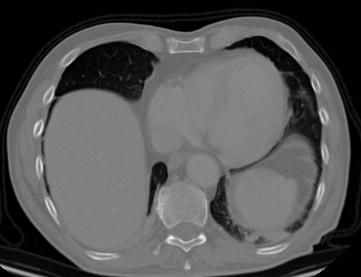

In [264]:
# Visualize an image
import random
from PIL import Image    #helps to display the image
from pathlib import Path #helps to get the file path as a path object

#''/kaggle/input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib

## Display a random image of the dataset
# 1. Get all image paths (* means "any combination")
image_path = Path('../input/chest-ctscan-images/Data')
image_path_list = list(image_path.glob('*/*/*.png'))
print(image_path_list[0]) #print's first image to check if works

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img
# Image.open("/content/data/pizza_steak_sushi/test/pizza/194643.jpg")

Try to check what the shape of the image is using numpy

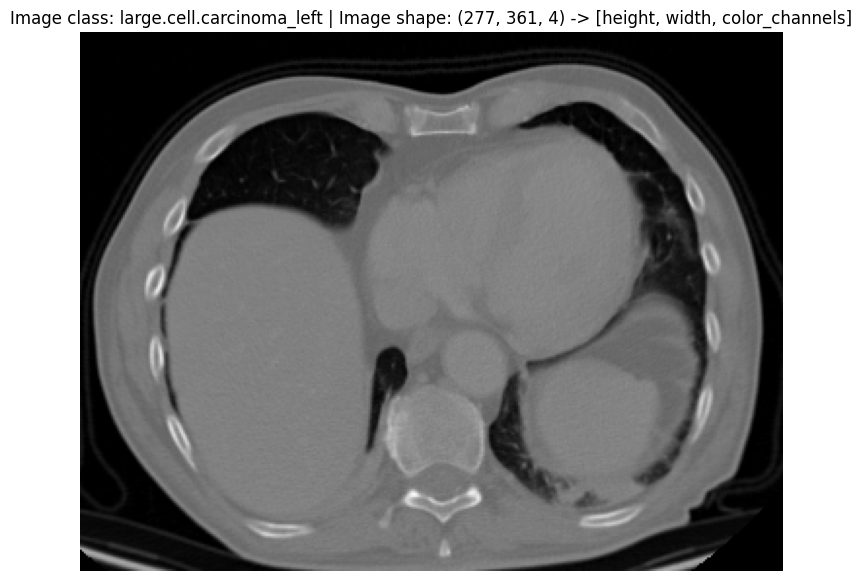

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# 2. Applying data augmentation to the images 

In [266]:
image_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [267]:
image_transform(img).shape, image_transform(img)

(torch.Size([3, 64, 64]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.1451, 0.2784, 0.3529],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.3529, 0.1176],
          [0.0000, 0.0000, 0.0000,  ..., 0.1451, 0.0314, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.1451, 0.2784, 0.3529],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.3529, 0.1176],
          [0.0000, 0.0000, 0.0000,  ..., 0.1451, 0.0314, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0

Now let's create a function to display images with and without data augmentation

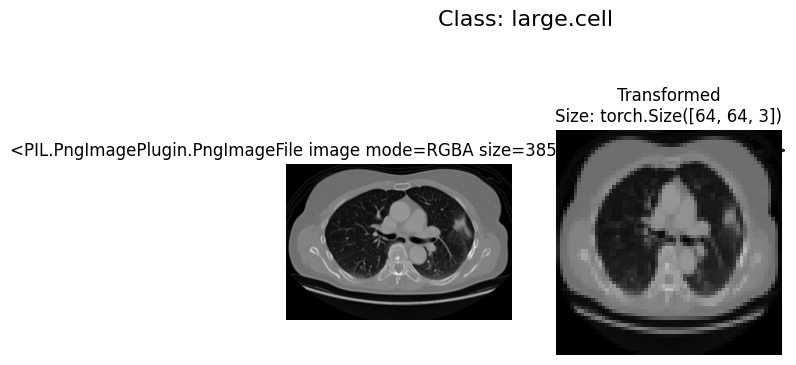

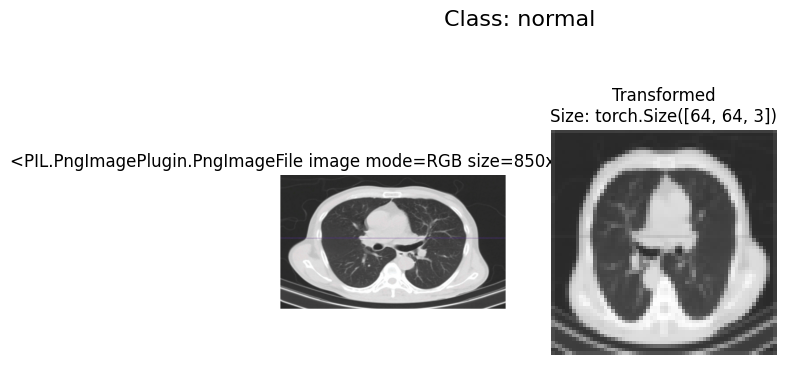

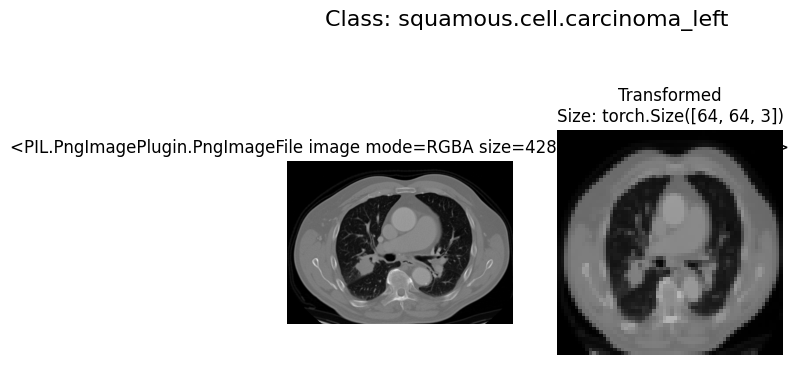

In [268]:
def plot_transformed_images(image_paths: list, transform, n = 3, seed = 42):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f)
            ax[0].axis(False)
            
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
    
plot_transformed_images(image_paths = image_path_list,
                        transform = image_transform,
                        n = 3,
                        seed = None)

# 3. Using ImageFolder to load the datasets

In [269]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_path,
                                 transform = image_transform,
                                 target_transform = None)
test_data = datasets.ImageFolder(root = test_path,
                                transform = image_transform,
                                target_transform = None)
valid_data = datasets.ImageFolder(root = valid_path)
train_data, test_data, valid_data

(Dataset ImageFolder
     Number of datapoints: 613
     Root location: ../input/chest-ctscan-images/Data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                Grayscale(num_output_channels=3)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 315
     Root location: ../input/chest-ctscan-images/Data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                Grayscale(num_output_channels=3)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 72
     Root location: ../input/chest-ctscan-images/Data/valid)

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')

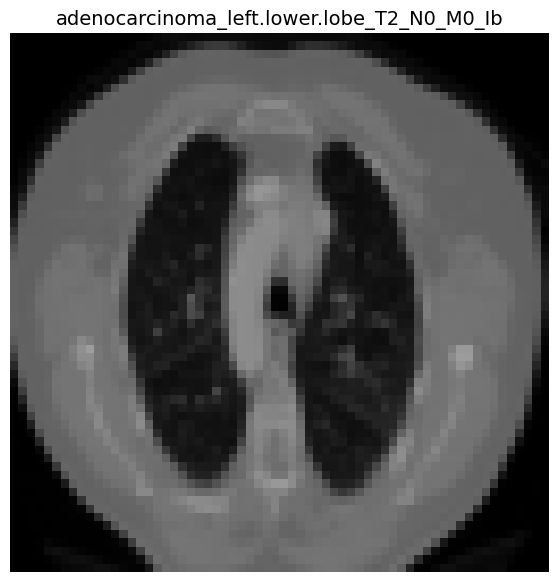

In [270]:
classes = train_data.classes
img, label = train_data[0][0], train_data[0][1]
# Rearrange the order of dimension
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot image
plt.figure(figsize = (10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(classes[label], fontsize = 14)

In [271]:
#Let's display the class of one of the dataset
classes = train_data.classes
classes, train_data[0][0].shape, train_data[0][0]

(['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
  'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
  'normal',
  'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'],
 torch.Size([3, 64, 64]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]])

In [272]:
# Length of the datasets are as follows
print(f"Length of train_data :{len(train_data)} | Length of test_data :{len(test_data)}")

Length of train_data :613 | Length of test_data :315


In [273]:
train_data[0][0].shape

torch.Size([3, 64, 64])

## Note: 
When using plt the order of the shape should be --> [HWC]

When using numpy the order of the shape should be --> [CHW]

# 4. Using DataLoader's to load the images in the form of batches

In [274]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            num_workers = 1,
                            shuffle = True)

print(f"Training dataloader contains {len(train_dataloader)} batches of {len(train_data)} samples..")
print(f"Testing dataloader contains {len(test_dataloader)} batches of {len(test_data)} samples..")

Training dataloader contains 20 batches of 613 samples..
Testing dataloader contains 10 batches of 315 samples..


Keeping the batch size as 32 we can easily collate all of the images and process them in batches as shown above. This makes processing easier

# 5. Using a TinyVGG model to evaluate data (First Implementation)

In [275]:
# Creating the model
class TinyVGG(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int) -> None:
        super().__init__()
        
        self.convblock1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                    stride = 2))
        
        self.convblock2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                    stride = 2))
        
        self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 13 * 13,
                 out_features = output_shape)
        )
    def forward(self, x):
        x = self.convblock1(x)
#         print(f"Shape of x: {x.shape}")
        x = self.convblock2(x)
#         print(f"Shape of x: {x.shape}")
        x = self.classifier(x)
#         print(f"Shape of x: {x.shape}")
        return x

In [276]:
torch.manual_seed(42)
model = TinyVGG(input_shape = 3,
               hidden_units = 10,
               output_shape = len(classes)).to(device)
model

TinyVGG(
  (convblock1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

In [277]:
# Download torchinfo to better represent data
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [278]:
from torchinfo import summary
BATCH_SIZE = 32
summary(model, input_size = (BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 4]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

# 6. Creating a function to train and test the model

In [279]:
image_batch, image_label = next(iter(train_dataloader))
image_batch.shape, image_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [280]:
# First create the train step
def train_step(model: torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device : torch.device = device):
    # Set up train loss and train accuracy values
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_pred = model(X)
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        # Gradient descent 
        optimizer.zero_grad()
        # Loss backwards
        loss.backward()
        # Optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred) * 100
        
    # Calculate average loss and accuracy
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [281]:
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn : torch.nn.Module,
             device: torch.device = device):
    # Setup test loss and accuracy values
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            # Put data onto target device
            X, y = X.to(device), y.to(device)
            # Do the forward pass
            test_pred_logits = model(X)
            # Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate accuracy
            test_pred_class = torch.argmax(torch.softmax(test_pred_logits, dim = 1), dim = 1)
            test_acc += (test_pred_class == y).sum().item() / len(test_pred_logits) * 100
    # Adjust metrics to get average loss and accuracy per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

In [282]:
# Create a final function to combine both steps as well as add a few functionalities such as
# 1) Tracking the time it takes to evaluate predictions
# 2) Storing all the values in a dictionary to make things easier

from timeit import default_timer as timer
from tqdm.auto import tqdm

# Creating function
def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module,
         epochs: int = 5,
         device: torch.device = device):
    
    # Create a results dictionary to store losses and accuracies
    results = {"train_loss":[],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                          dataloader = train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer,
                                          device = device)
        test_loss, test_acc = test_step(model = model,
                                       dataloader = test_dataloader,
                                       loss_fn = loss_fn,
                                       device = device)
        # Print out the loss and accuracy for each iteration
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")
        
    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    
    return results

# 7. Train and evaluate model

In [283]:
# Set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.0001)

start_time = timer()
model_results = train(model = model,
                     train_dataloader = train_dataloader,
                     test_dataloader = test_dataloader,
                     optimizer = optimizer,
                     loss_fn = loss_fn,
                     epochs = NUM_EPOCHS,
                     device = device)
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.3838 | Train acc: 28.5625% | Test loss: 1.3720 | Test acc: 38.1944%
Epoch: 1 | Train loss: 1.3723 | Train acc: 32.1562% | Test loss: 1.3597 | Test acc: 38.0208%
Epoch: 2 | Train loss: 1.3633 | Train acc: 32.1562% | Test loss: 1.3481 | Test acc: 38.1366%
Epoch: 3 | Train loss: 1.3622 | Train acc: 31.3125% | Test loss: 1.3426 | Test acc: 38.3102%
Epoch: 4 | Train loss: 1.3628 | Train acc: 31.3125% | Test loss: 1.3439 | Test acc: 37.9051%
Epoch: 5 | Train loss: 1.3559 | Train acc: 30.4688% | Test loss: 1.3373 | Test acc: 37.8472%
Epoch: 6 | Train loss: 1.3393 | Train acc: 39.0938% | Test loss: 1.3251 | Test acc: 51.2963%
Epoch: 7 | Train loss: 1.3127 | Train acc: 45.6562% | Test loss: 1.3034 | Test acc: 50.2431%
Epoch: 8 | Train loss: 1.2862 | Train acc: 44.9688% | Test loss: 1.2705 | Test acc: 50.2431%
Epoch: 9 | Train loss: 1.2385 | Train acc: 49.8750% | Test loss: 1.2253 | Test acc: 54.2477%
Total training time: 63.925 seconds
